# Machine Learning Question - 1
Implement Linear Regression with Gradient Descent

## Let's read the .names file to get info of the dataset

In [1]:
with open("winequality.names") as fptr:
    print(fptr.read())

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
%matplotlib inline
import math

In [3]:
red_wine_data = pd.read_csv("winequality-red.csv",sep=";")   #as file is separated by semicolons using a separator attribute

In [4]:
# Explore the columns and data types of them
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# See first few top rows of the dataset
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#Columns:
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
red_wine_data.quality.max()

8

In [8]:
red_wine_data.quality.min()

3

Minimum rating for quality is 3 and Maximum is 8

In [9]:
# Statistical Summary of the dataset
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
#Let's see the shape ie. number rows and columns of the dataframe
red_wine_data.shape

(1599, 12)

In [11]:
# Check if there are any null values
red_wine_data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [12]:
# Just seeing the unique quality values of the dataframe
red_wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
# let's drop the duplicate rows as redundant info will not help us in unique training
red_wine_data.drop_duplicates(subset=None,inplace=True)

In [14]:
red_wine_data.shape

(1359, 12)

We see a few rows have dropped which were duplicates

# Data Viz

<AxesSubplot:xlabel='quality', ylabel='count'>

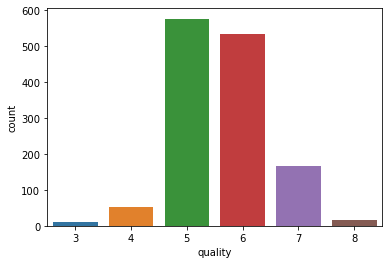

In [15]:
# To see the counts of qualities
sns.countplot(x='quality',data= red_wine_data)

In [16]:
red_wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<AxesSubplot:>

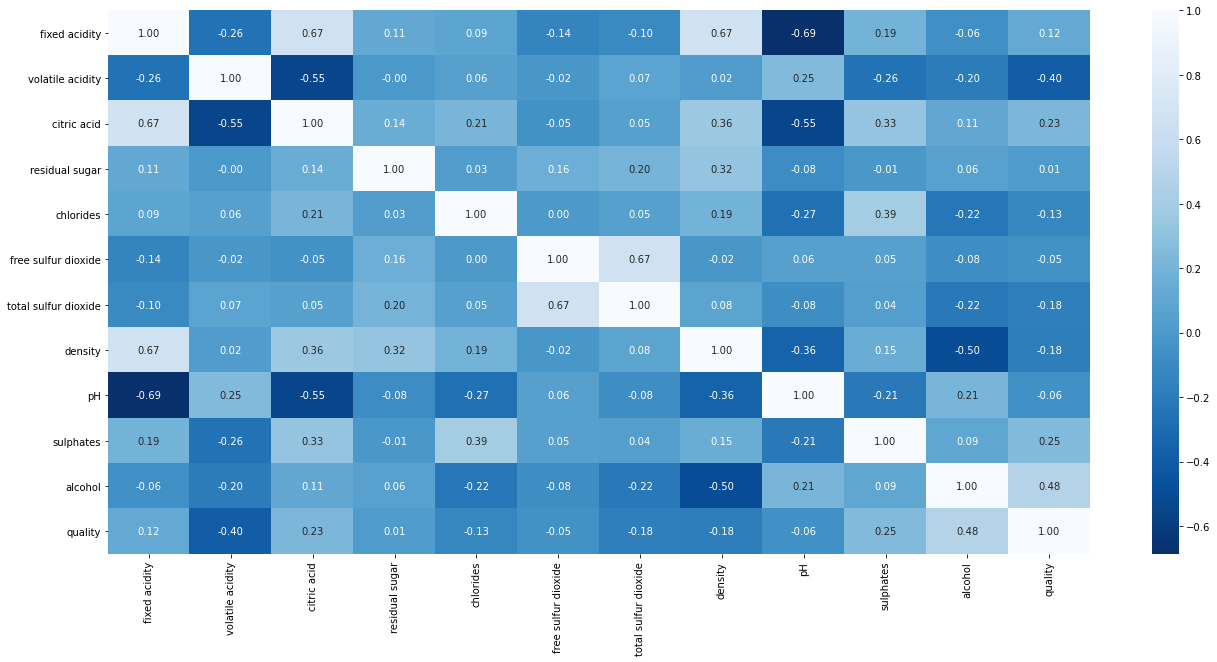

In [17]:
plt.figure(figsize=[22,10])
sns.heatmap(red_wine_data.corr(),fmt='.2f',annot=True,cmap="Blues_r")

We observe that the features pH and fixed acidity are highly correlated among others so we plan to drop one.Before concluding on the same let's check the Variance Inflation Factor (VIF) to see if multi-collinearity exists in this multiple regression problem


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [19]:
calc_vif(red_wine_data)

,variables,VIF
0,fixed acidity,75.023033
1,volatile acidity,17.387181
2,citric acid,9.195827
3,residual sugar,4.915782
4,chlorides,6.440176
5,free sulfur dioxide,6.442192
6,total sulfur dioxide,6.601411
7,density,1547.276977
8,pH,1102.707051
9,sulphates,22.810607


In [20]:
calc_vif(red_wine_data)

,variables,VIF
0,fixed acidity,75.023033
1,volatile acidity,17.387181
2,citric acid,9.195827
3,residual sugar,4.915782
4,chlorides,6.440176
5,free sulfur dioxide,6.442192
6,total sulfur dioxide,6.601411
7,density,1547.276977
8,pH,1102.707051
9,sulphates,22.810607


In [21]:
calc_vif(red_wine_data.drop(['quality','pH','density'], axis=1))
#calc_vif(red_wine_data1.drop(['quality','density','pH','fixed acidity','sulphates','alcohol'], axis=1))
#red_wine_data1 = red_wine_data1.drop(['density','pH'], axis=1)

,variables,VIF
0,fixed acidity,37.030433
1,volatile acidity,15.091381
2,citric acid,8.619115
3,residual sugar,4.912710
4,chlorides,5.706700
5,free sulfur dioxide,6.342563
6,total sulfur dioxide,5.974092
7,sulphates,21.622546
8,alcohol,36.856500


In [22]:
# Using Z-Scaler z = (x - mean)/stddeviation, normalise data
def normalize(data):
    for i in range(0,12):
        data.iloc[:,i] = ((data.iloc[:,i] - np.mean(data.iloc[:,i]))/np.std(data.iloc[:, i]))
    return data

In [23]:
# Using Z-Scaler z = (x - mean)/stddeviation, normalise data
def normalize(data):
    for i in range(0,9):
        data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
    return data

In [24]:
#X = red_wine_data.drop(['quality','pH'], axis=1).values
X = red_wine_data.drop(['quality','pH','density'], axis=1).values

In [25]:
X.shape

(1359, 9)

In [26]:
normalize(X)

array([[-0.52443096,  0.93200015, -1.39325797, ..., -0.38404973,
        -0.57856134, -0.95437429],
       [-0.29406274,  1.91580043, -1.39325797, ...,  0.60407328,
         0.12482157, -0.5845748 ],
       [-0.29406274,  1.25993358, -1.18861732, ...,  0.2148127 ,
        -0.05102416, -0.5845748 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  0.12498334,
         0.59374351,  0.7097234 ],
       [-1.38831178,  0.63139451, -0.77933603, ..., -0.08461851,
         0.3006673 , -0.21477532],
       [-1.33071973, -1.19956712,  1.01126962, ..., -0.14450476,
         0.00759108,  0.52482366]])

X = red_wine_data.drop('quality',axis=1).values
X


features = red_wine_data.columns[:-1]
features

In [27]:
y = red_wine_data['quality'].values
y = np.array(y).reshape((len(y),1))  #Reshaping as y has to be a matrix of order rows * 1

In [28]:
length = red_wine_data.shape[0]
length

1359

In [29]:
#for intercept which will be as a0*x0, keeping it as 1, let's add bias
bias = np.ones(length).reshape(-1,1)
bias

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [30]:
# Let's append this to the features matrix
X = np.concatenate((bias,X),1)

In [31]:
X

array([[ 1.        , -0.52443096,  0.93200015, ..., -0.38404973,
        -0.57856134, -0.95437429],
       [ 1.        , -0.29406274,  1.91580043, ...,  0.60407328,
         0.12482157, -0.5845748 ],
       [ 1.        , -0.29406274,  1.25993358, ...,  0.2148127 ,
        -0.05102416, -0.5845748 ],
       ...,
       [ 1.        , -1.38831178,  0.11216658, ...,  0.12498334,
         0.59374351,  0.7097234 ],
       [ 1.        , -1.38831178,  0.63139451, ..., -0.08461851,
         0.3006673 , -0.21477532],
       [ 1.        , -1.33071973, -1.19956712, ..., -0.14450476,
         0.00759108,  0.52482366]])

In [32]:
y.shape

(1359, 1)

In [33]:
X.shape

(1359, 10)

In [34]:
def train_test_split(X, Y, split):

    #randomly assigning split% rows to training set and rest to test set 
    indices = np.array(range(len(X)))
    
    train_size = round(split * len(X))

    np.random.shuffle(indices)

    train_indices = indices[0:train_size]
    test_indices = indices[train_size:len(X)]

    X_train = X[train_indices, :]
    X_test = X[test_indices, :]
    y_train = Y[train_indices, :]
    y_test = Y[test_indices, :]
    
    return X_train,y_train, X_test, y_test

In [35]:
split = 0.8
X_train, y_train, X_test,y_test = train_test_split(X, y, split)

In [36]:

# X_train contains 80% of total dataset
print(X_train.shape)
print(y_train.shape)
# X_test contains 20% of total dataset
print(X_test.shape)
print(y_test.shape)

(1087, 10)
(1087, 1)
(272, 10)
(272, 1)


In [37]:
X_train

array([[ 1.        ,  0.33944986, -0.70766698, ...,  0.00521085,
         0.65235875,  0.0625743 ],
       [ 1.        ,  1.89443534,  0.00285544, ..., -0.98291216,
         0.47651303,  0.98707302],
       [ 1.        , -0.9851674 ,  1.47855586, ..., -1.0427984 ,
        -0.9302528 ,  1.63422212],
       ...,
       [ 1.        , -0.63961507,  0.38544444, ...,  1.23287883,
        -0.63717659, -0.86192442],
       [ 1.        , -0.00610247, -0.21576684, ..., -0.92302591,
        -0.34410037, -0.86192442],
       [ 1.        ,  0.45463397, -1.2542227 , ..., -0.68348094,
         1.12128069,  1.17197276]])

In [38]:
def ols_estimator(X, Y):
    first_term = np.linalg.inv(np.dot(np.transpose(X_train),X_train ) )
    second_term = np.dot(np.transpose(X_train),y_train)
    beta = np.dot(first_term, second_term)
    return beta

In [39]:
def predict(X_test, beta):
    return np.dot(X_test, beta)

# In the below cell we calculate the optimal vector a ie. a = (X^T * X^-1)* X^T* y. The * here refers to the dot product of the numpy matrices

In [40]:
beta = ols_estimator(X_train, y_train)
print(beta)
predictions = predict(X_test, beta)

print(predictions.shape)

[[ 5.62662512e+00]
 [ 5.73829876e-02]
 [-2.19145928e-01]
 [-2.72624022e-02]
 [-1.08364020e-03]
 [-8.30568013e-02]
 [ 4.28670157e-02]
 [-8.33302728e-02]
 [ 1.39153757e-01]
 [ 3.18977331e-01]]
(272, 1)


In [41]:
beta.shape

(10, 1)

In [42]:
X_test.shape

(272, 10)

In [43]:
beta.shape

(10, 1)

In [ ]:
predictions.shape

In [ ]:
type(predictions)

In [ ]:
pd.DataFrame({
    "Actual":np.ravel(y_test),
    "Predictions":np.ravel(predictions)
})

In [ ]:
# Here we are calculating the cost function
#which is derivative of the Mean Squared Error
#MSE --> (Summation of square of the difference between the actual and predicted values (by pluggin into the equation divided by the dataset size)
def cost_function(X_train, y_train, beta):
    n = len(y_train)
    J = np.sum((X_train.dot(beta) - y_train) ** 2)/(2 * n)
    return J

In [ ]:
cost_function(X_train,y_train,beta)  #Note beta was estimated using the Ordinary Least Squares Estimator

Gradient descent is an iterative technique for minimizing the squared error. Gradient descent works
by trying different parameter values until the model with the lowest mean squared error is found

alpha is the learning rate

In [ ]:
alpha = 0.001

In [ ]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [ ]:
# 100000 Iterations
grad_beta, cost_history = gradient_descent(X, y, beta, alpha, 1000)

# New Values of B
print(grad_beta)

# Final Cost of new B
print(cost_history[-1])


In [ ]:
predictions = predict(X_test, grad_beta)

print(predictions.shape)

In [ ]:
pd.DataFrame({
    "Actual":np.ravel(y_test),
    "Predictions":np.ravel(predictions)
})

In [ ]:
def calculate_metrics(predictions, Y_test):

    #calculating mean absolute error
    MAE = np.mean(np.abs(predictions-Y_test))
    N = X.shape[0]
    p = X.shape[1]-1 #No of predictor variables, -1 as we had concatenated one's as beta-zero
    #calculating root mean square error
    MSE = np.square(np.subtract(Y_test,predictions)).mean() 
    RMSE = math.sqrt(MSE)

    #Let's calculate r_square
    ssr = np.sum(np.square((Y_test- predictions)))   #Sum of squares residuals  (actual-predicted)
    mean = np.mean(Y_test)
    sst = np.sum(np.square(Y_test-mean))    #Sum of squares totals (actual-mean)  sst = ssresiduals +ssregression
    r_square = 1 - (ssr/sst)      
    adj_r_square = 1 - (((1-r_square)*(1599-1))/(1599-11-1))

    return MAE, RMSE, r_square,adj_r_square

In [ ]:
mae, rmse, r_square,adj_r_square = calculate_metrics(predictions, y_test)
print("The Mean Absolute Error: ", mae)
print("The Root Mean Square Error: ", rmse)
print("The R square value: ", r_square)
print("The Adjusted R square value is : ", adj_r_square)

After several tuning of alpha,split size,and iterations in gradient descent function we get above value for the metrics